In [24]:
import torch
import torchaudio
from torchaudio.models import WaveRNN

In [25]:
wavernn = WaveRNN(upsample_scales=[5,5,8], n_classes=512, hop_length=200)

In [26]:
from utils.dataset import get_audio

In [37]:
file = './data/segments/'
waveform = get_audio(2056002088, file)
sample_rate = 16000
waveform = waveform.unsqueeze(0)
waveform.shape

torch.Size([1, 1, 38628])

In [46]:
waveform = waveform[:,:,:38600] # 200 * (n_times + 4) = 200 * (189 + 4) = 38600

In [50]:
specgram = torchaudio.transforms.MelSpectrogram(sample_rate, n_mels=80, hop_length=200)(waveform)
specgram.shape

torch.Size([1, 1, 80, 191])

In [51]:
# (n_time - kernel_size + 1) * hop_length



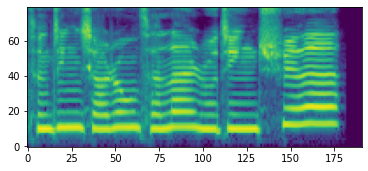

In [52]:
import matplotlib.pyplot as plt
import librosa
plt.imshow(librosa.power_to_db(specgram).squeeze(), origin='lower')

In [53]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH

In [54]:
vocoder = bundle.get_vocoder()
waveforms, lengths = vocoder(specgram[0], specgram.shape[-1])

In [55]:
waveforms.shape, waveforms

(torch.Size([1, 52525]),
 tensor([[-4.5043e-04, -9.0468e-03,  5.5504e-02,  ..., -1.0598e-03,
           8.6213e-05,  4.5043e-04]]))

In [70]:
waveforms.shape, lengths

(torch.Size([1, 52525]), 52525)

In [75]:
waveforms[0][9990:10000]

tensor([-1.0000,  0.9573, -0.7694,  0.9573,  0.9573,  0.9573,  0.9573,  0.9573,
        -1.0000, -1.0000])

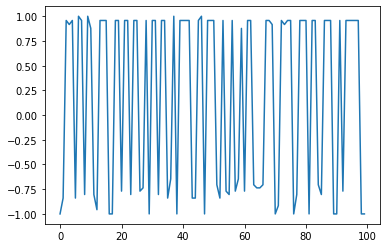

In [76]:
plt.plot(waveforms[0][9900:10000])

In [85]:
torchaudio.save('./audio-temp2.wav', waveforms, 16000)

In [68]:
# output = wavernn(waveform, specgram)

In [32]:
# output.shape

torch.Size([1, 1, 38000, 512])

In [69]:
# plt.imshow(output.detach().numpy().squeeze().T[:,:1990], origin='lower')

In [78]:
w_re, sr = torchaudio.load('./audio-temp2.wav')

In [83]:
w_re.shape

torch.Size([1, 38000])

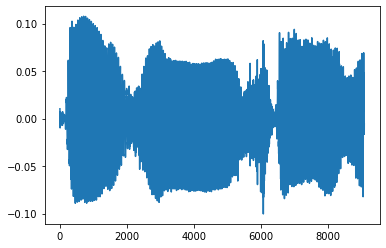

In [82]:
plt.plot(w_re[0][900:10000])